NOTE: This part of analysis is being done by Aman, it is still a work in progress. Muwei is doing other parts of analysis. Feel free to give us your inputs any changes, suggestions etc.

In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

In [2]:
review_table = pd.read_csv('./Scraper/ReviewScraper/merged_reviews_table.csv')
ceo_table = pd.read_csv('./Scraper/ReviewScraper/ceo_ratings.csv')
full_time_table = pd.read_csv('./Scraper/SalaryScraper/fulltime_merged_salaries_company_table.csv')

In [3]:
review_table.head(2)

,date,employee_title,location,employee_status,review_title,years_at_company,helpful,pros,cons,advice_to_mgmt,rating_overall,rating_balance,rating_culture,rating_career,rating_comp,rating_mgmt,company
0,Sat Nov 02 2019 17:40:06 GMT-0700 (Pacific Day...,Software Engineer,"San Francisco, CA",Current Employee,Good company,I have been working at Dropbox full-time for l...,NaN,"Good food(the best part), good environment,",Product is not competitive\nManagement needs s...,NaN,5.0,5.0,5.0,5.0,5.0,5.0,dropbox
1,Mon Sep 23 2019 20:40:55 GMT-0700 (Pacific Day...,Account Executive,"Austin, TX",Current Employee,Great place to work,I have been working at Dropbox full-time for m...,NaN,In-house chefs serving premium breakfast/lunch...,no cons specific to Dropbox,NaN,5.0,5.0,5.0,5.0,5.0,5.0,dropbox


In [4]:
ceo_table.head()

,company,recommend_to_a_friend,approve_of_ceo
0,google,87,92.0
1,apple,78,91.0
2,facebook,88,92.0
3,amazon,75,86.0
4,linkedin,84,98.0


In [4]:
full_time_table.head()

,job_title,mean_pay,salary_range,company,category
0,Software Engineer,"$114,610/yr",Range: $70K - $166K,cisco,engineering
1,Software Engineer IV,"$133,178/yr",Range: $99K - $169K,cisco,engineering
2,Software Engineer III,"$113,381/yr",Range: $79K - $162K,cisco,engineering
3,Network Consulting Engineer,"$115,899/yr",Range: $50K - $259K,cisco,engineering
4,Senior Software Engineer,"$134,594/yr",Range: $87K - $190K,cisco,engineering


In [5]:
print("Total number of reviews from review table: {}".format(len(review_table)))
print("Total number of salary from salary table: {}".format(len(full_time_table)))
print("Total number of ceo ratins: {}".format(len(ceo_table)))

Total number of reviews from review table: 6066
Total number of salary from salary table: 6322
Total number of ceo ratins: 20


## Q.2(a) Which city in US offers the most job opportunities?

In [6]:
def compute_most_job_by_city(jobs, top=10):
    jobs = jobs[pd.notnull(jobs['location'])]
    jobs['city'] = jobs['location'].apply(lambda x: x.split(", ")[0].lower())
    gb = jobs.groupby('city')
    
    city_num = dict(gb.size())
    num_city = sorted([(v, k) for k,v in city_num.items()], key=lambda x: x[0], reverse=True)[:top]
    count = [x[0] for x in num_city]
    cities = [x[1].title().replace(" ", "\n") for x in num_city]
    
    return count, cities  

In [7]:
city_count, cities = compute_most_job_by_city(review_table.copy())

/Users/amanraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


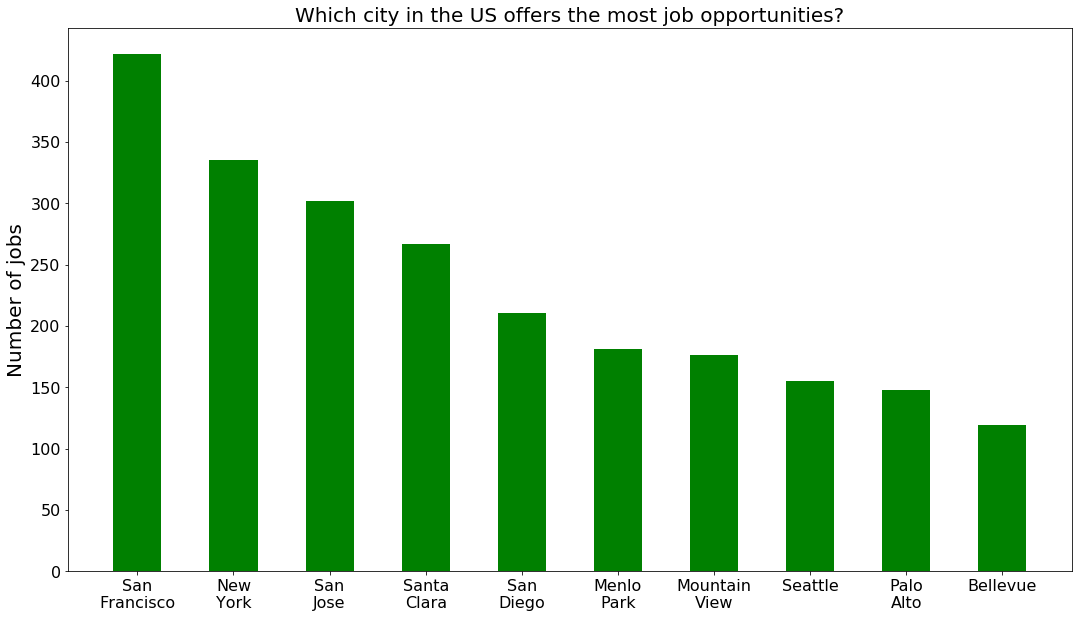

In [9]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.bar(cities, city_count, facecolor="green", width=0.5)
#ax.set_xlabel('Cities', fontsize=20)
ax.set_ylabel('Number of jobs', fontsize=20)
ax.set_title('Which city in the US offers the most job opportunities?', fontsize=20)
ax.tick_params(labelsize=16)
fig.savefig('./graphs/a1_q2a.png', format='png', dpi=300)

## Q.2(b) Which state in US offers the most job opportunities?

In [10]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [11]:
def compute_most_job_by_state(jobs, top=10):
    jobs = jobs[pd.notnull(jobs['location'])]
    jobs['state'] = jobs['location'].apply(lambda x: x.split(", ")[-1])

    gb = jobs.groupby('state')
    state_num = dict(gb.size())
    num_state = sorted([(v, k) for k,v in state_num.items()], key=lambda x: x[0], reverse=True)[:top]
    count = [x for x,_ in num_state]
    states = [x if len(abbrev_us_state[x])>12 else abbrev_us_state[x].replace(" ", "\n") for _,x in num_state]
    
    return count, states

In [12]:
count_state, states = compute_most_job_by_state(review_table.copy())

/Users/amanraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


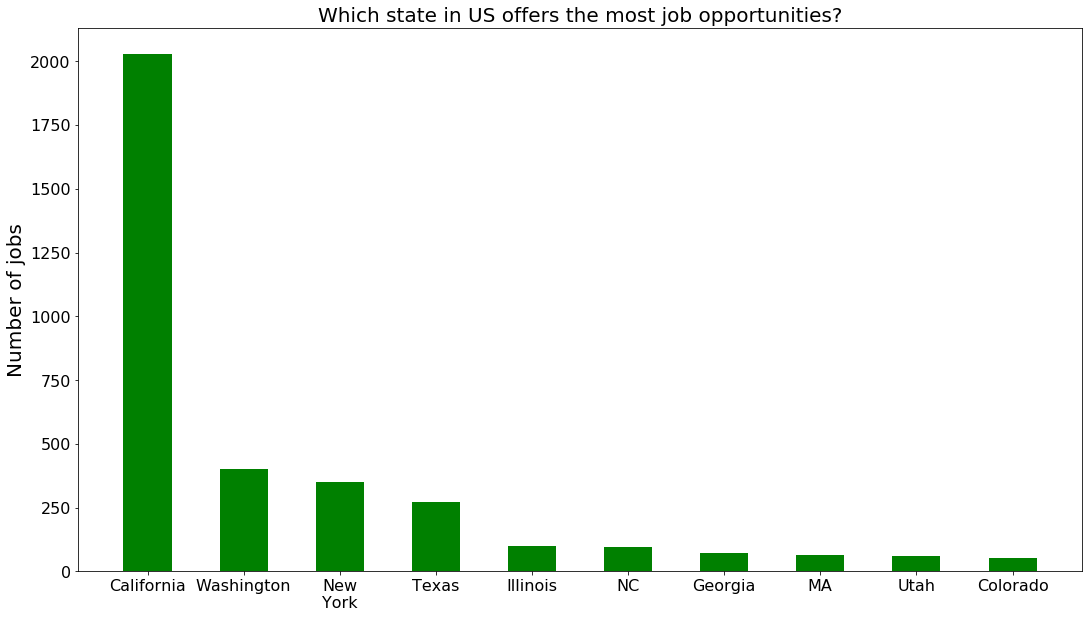

In [14]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.bar(states, count_state, facecolor="green", width=0.5)
#ax.set_xlabel('States', fontsize=20)
ax.set_ylabel('Number of jobs', fontsize=20)
ax.set_title('Which state in US offers the most job opportunities?', fontsize=20)
ax.tick_params(labelsize=16)
fig.savefig('./graphs/a1_q2b.png', format='png', dpi=300)

## Q.6 What’s the percentage of employees of a company that approves their CEO?

In [15]:
ceo_table = ceo_table.dropna() # this drops HP as we don't have CEO approval rating
ceo_table.reset_index(drop=True, inplace=True)

In [16]:
company = ceo_table['company'].values
company = [c.title() if c != "IBM" else c for c in company]
recom = ceo_table['recommend_to_a_friend'].values
approve = ceo_table['approve_of_ceo'].values

# fixing company names to short form
#company[-1], company[-2], company[-5] = "Qual\ncomm", "Wal\nmart", "Bloom\nberg"
#company[2], company[8] = "Face\nbook", "Sales\nforce"

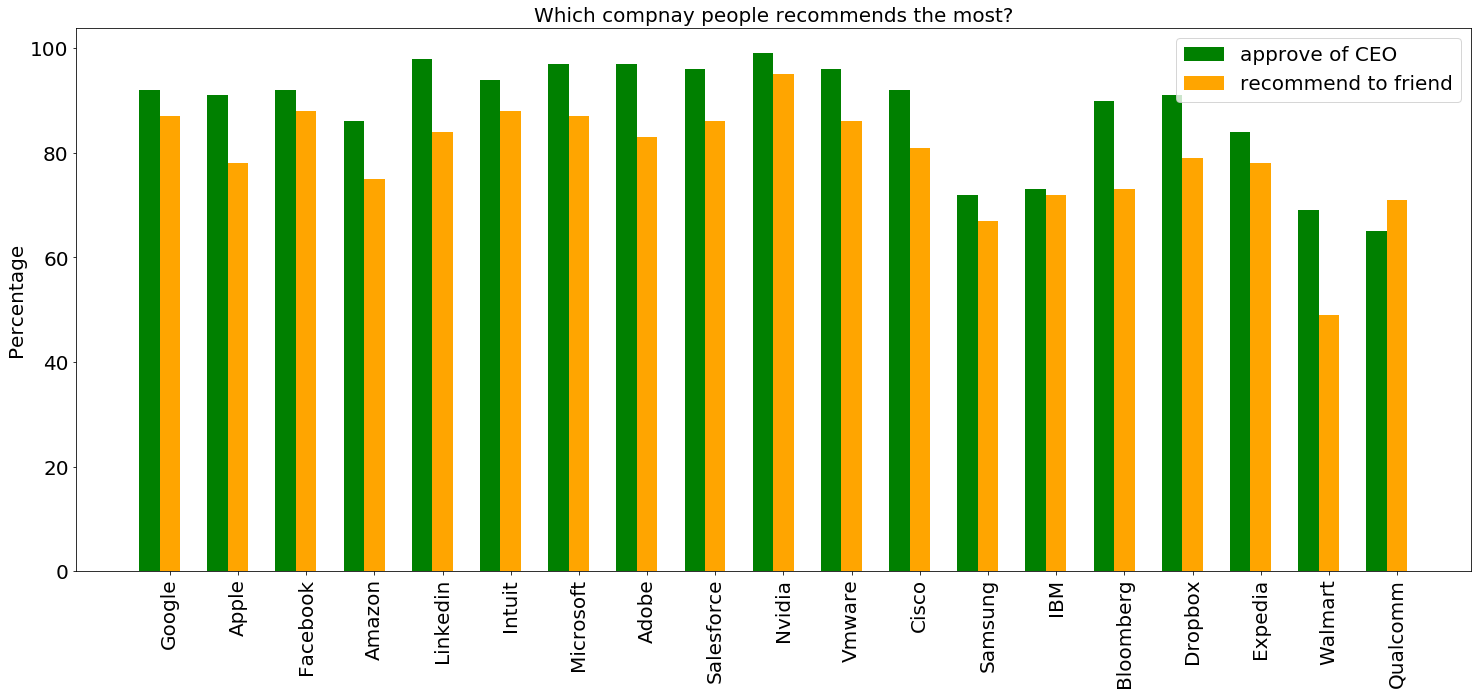

In [17]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
x = list(range(len(company)))
total_width, n = 0.6, 2
width = total_width / n

ax.bar(x, approve, width=width, label='approve of CEO', color='green')

for i in range(len(x)):
    x[i] = x[i] + width
ax.bar(x, recom, width=width, label='recommend to friend', tick_label=company, color='orange')


#ax.set_xlabel('Company', fontsize=20)
ax.set_ylabel('Percentage', fontsize=20)
ax.set_title('Which compnay people recommends the most?', fontsize=20)
ax.legend(fontsize=20)

plt.xticks(rotation=90)

ax.tick_params(labelsize=20)
fig.savefig('./graphs/a1_q6.png', format='png', dpi=300)

## Q.4(a) Distribution of postive/negative reviews among companies?

In [18]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
anlyzer = SentimentIntensityAnalyzer()

/Users/amanraj/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [19]:
def cal_pos_neg_review_per(review):
    gb = review.groupby('company')
    comp = gb.indices.keys()
    review = {'positive': [], 'negative': [], 'neutral': []}
    
    def process_group(gname):
        df = gb.get_group(gname)
        total = 2 * len(df)
        
        pros = df['pros'].apply(lambda x: anlyzer.polarity_scores(x))
        pos = pros.apply(lambda x: 1 if x['pos'] >= 0.4 else 0)
        pos = int(sum(pos.values)/total * 100)
        
        cons = df['cons'].apply(lambda x: anlyzer.polarity_scores(x))
        neg = cons.apply(lambda x: 1 if x['neg'] >= 0.4 else 0)
        neg = int(sum(neg.values)/total * 100)
        
        neu = 100 - (pos + neg)
        
        return pos, neg, neu
        
    
    for c in comp:
        pos, neg, neu = process_group(c)
        review['positive'].append(pos)
        review['negative'].append(neg)
        review['neutral'].append(neu)
        
    comp = [c.upper() if c == "ibm" or c == "hp" else c.title() for c in comp]
        
    return comp, review
        

In [20]:
company, reviews = cal_pos_neg_review_per(review_table.copy())
positive = np.asarray(reviews['positive'])
negative = np.asarray(reviews['negative'])
neutral = np.asarray(reviews['neutral'])

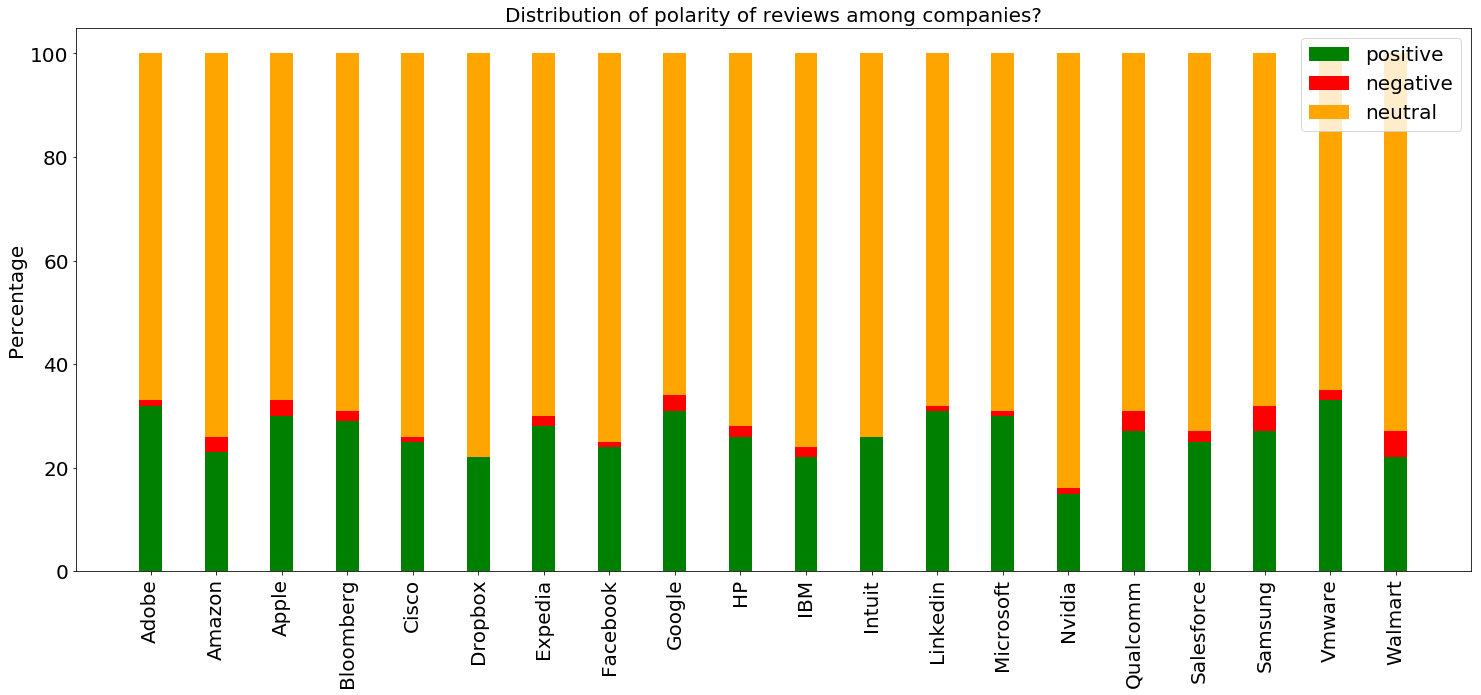

In [21]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
x = list(range(len(company)))
width = 0.35

ax.bar(x, positive, width=width, label='positive', color='green', tick_label=company)

ax.bar(x, negative, width=width, bottom=positive, label='negative', color='red')

ax.bar(x, neutral, width=width, bottom=positive+negative, label='neutral', color='orange')

#ax.set_xlabel('Company', fontsize=20)
ax.set_ylabel('Percentage', fontsize=20)
ax.set_title('Distribution of polarity of reviews among companies?', fontsize=20)
ax.legend(fontsize=20)

plt.xticks(rotation=90)

ax.tick_params(labelsize=20)
fig.savefig('./graphs/a1_q4a.png', format='png', dpi=300)

## Q.4(b) What’s the overall rating of the company?

In [22]:
def get_comp_career_rating(review):
    review = review[pd.notnull(review['rating_career'])]
    review = review[pd.notnull(review['rating_comp'])]
    
    gb = review.groupby('company')
    comp = gb.indices.keys()
    rating = {'compensation': [], 'career': []}
    
    def process_group(gname):
        df = gb.get_group(gname)
        
        career = sum(df['rating_career']) / len(df['rating_career'])
        compens = sum(df['rating_comp']) / len(df['rating_comp'])
        
        return compens, career
        
    
    for c in comp:
        compens, career = process_group(c)
        rating['compensation'].append(compens)
        rating['career'].append(career)
        
    comp = [c.upper() if c == "ibm" or c == "hp" else c.title() for c in comp]
        
    return comp, rating
        

In [23]:
company, rating = get_comp_career_rating(review_table.copy())

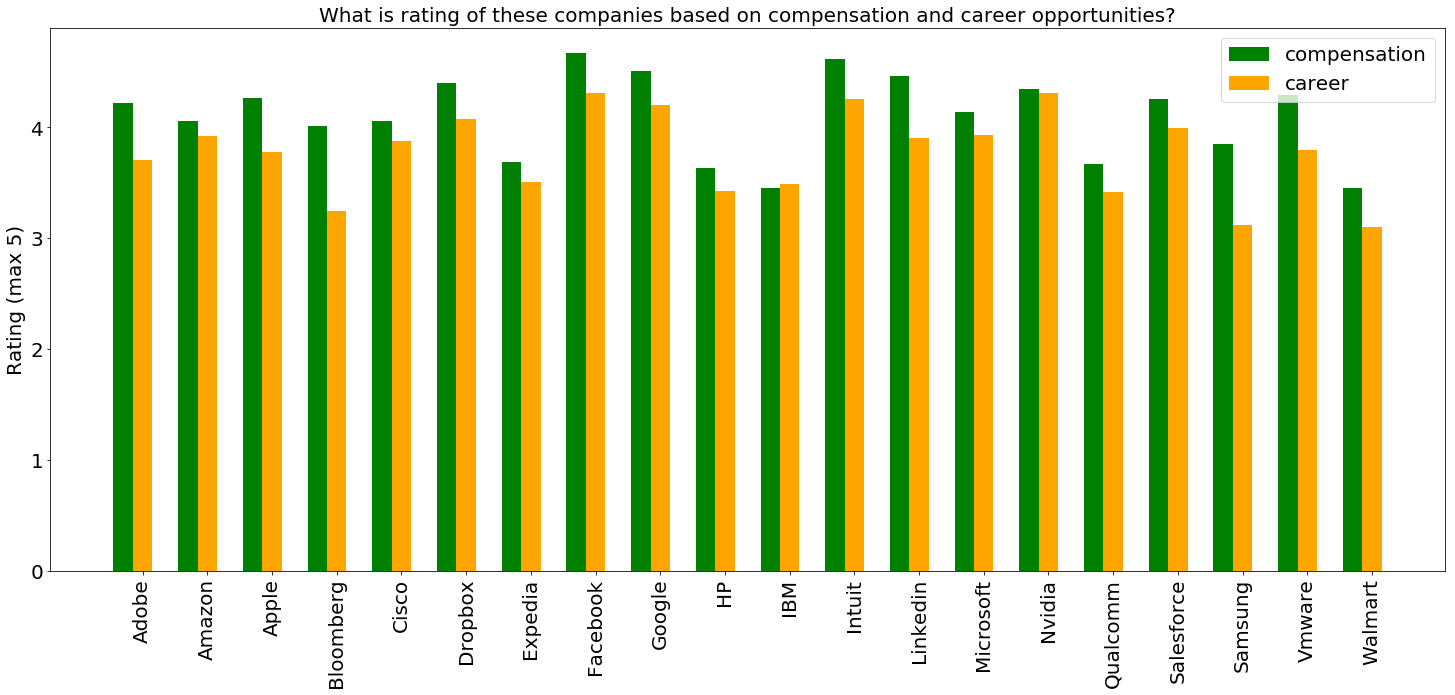

In [24]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
x = list(range(len(company)))
total_width, n = 0.6, 2
width = total_width / n

ax.bar(x, rating['compensation'], width=width, label='compensation', color='green')

for i in range(len(x)):
    x[i] = x[i] + width
ax.bar(x, rating['career'], width=width, label='career', tick_label=company, color='orange')


#ax.set_xlabel('Company', fontsize=20)
ax.set_ylabel('Rating (max 5)', fontsize=20)
ax.set_title('What is rating of these companies based on compensation and career opportunities?', fontsize=20)
ax.legend(fontsize=20)

plt.xticks(rotation=90)

ax.tick_params(labelsize=20)
fig.savefig('./graphs/a1_q4b.png', format='png', dpi=300)

### Currently this part is not giving any useful information, we might just leave it out in final presentation

## Q.5(a) Which company offers the most number of jobs?

In [22]:
def compute_most_jobs_by_company(jobs, top=10):   
    gb = jobs.groupby('company')
    comp_num = dict(gb.size())
    num_comp = sorted([(v, k) for k,v in comp_num.items()], key=lambda x: x[0], reverse=True)[:top]
    count = [x for x,_ in num_comp]
    comp = [x.title().replace(" ", "\n") for _,x in num_comp]
    
    return count, comp

In [23]:
count_comp, top_comp = compute_most_jobs_by_company(full_time_table.copy())

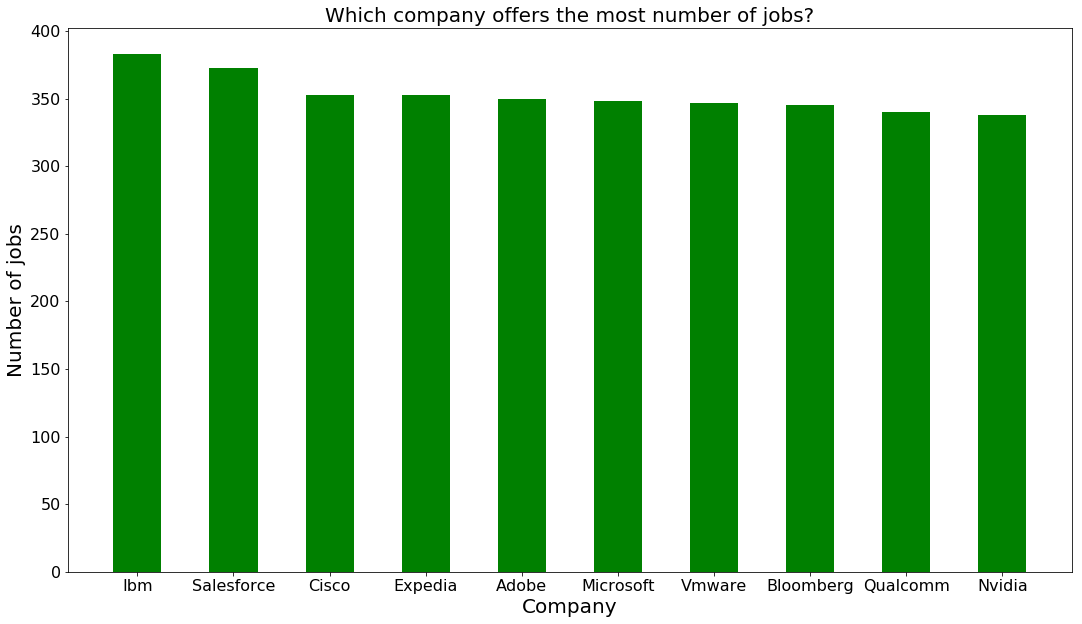

In [24]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.bar(top_comp, count_comp, facecolor="green", width=0.5)
ax.set_xlabel('Company', fontsize=20)
ax.set_ylabel('Number of jobs', fontsize=20)
ax.set_title('Which company offers the most number of jobs?', fontsize=20)
ax.tick_params(labelsize=16)
#fig.savefig('image.png', format='png', dpi=300)

## Q.5(b) Which company offers a versatile portfolio of jobs?

In [25]:
def count_unique_titles_by_company(jobs, top=10):
    gb = jobs.groupby('company')
    gb = gb.nunique(dropna=True).sort_values(ascending=False, by=['job_title'])
    comp = gb.index[:top]
    titles = [gb.loc[idx, 'job_title'] for idx in comp]
    comp = [x.title().replace(" ", "\n") for x in comp]
    
    return titles, comp
    

In [27]:
unique_titles, vcomp = count_unique_titles_by_company(full_time_table.copy())

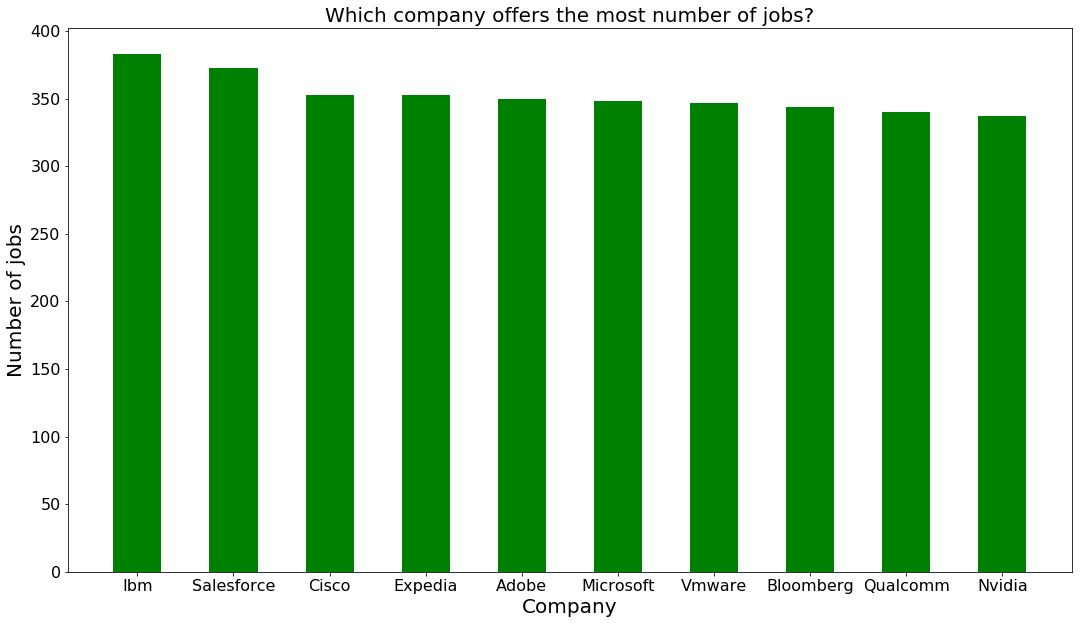

In [28]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.bar(vcomp, unique_titles, facecolor="green", width=0.5)
ax.set_xlabel('Company', fontsize=20)
ax.set_ylabel('Number of jobs', fontsize=20)
ax.set_title('Which company offers the most number of jobs?', fontsize=20)
ax.tick_params(labelsize=16)
#fig.savefig('image.png', format='png', dpi=300)